In [1]:
import pandas as pd
import numpy as np
import magic
from matplotlib import pyplot as plt
import importlib
%matplotlib inline
importlib.reload(magic)
import seaborn as sns

In [2]:
csv_file = 'hist'

In [3]:

data = pd.read_csv(csv_file, index_col=False)

data['tournament'] = data.tournament_scores/data.num_players
data['effectiveness'] = np.log(data.scores+1)/np.log(data.map_rivers_count/data.num_players)
data['density'] = np.log(data.map_rivers_count)/np.log(data.map_sites_count)

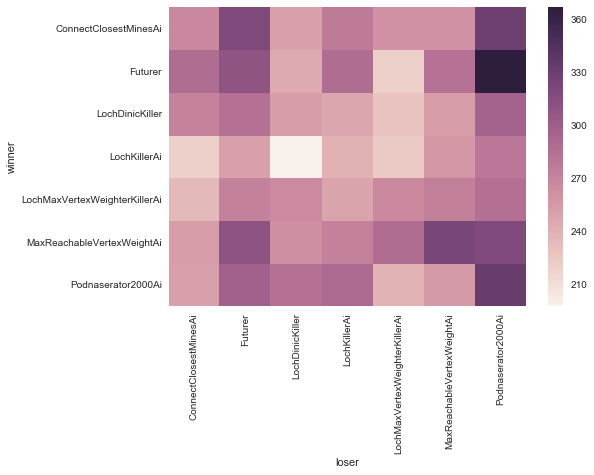

In [4]:
test = data.loc[:  , ['game_number','ranking','server_name']]
test = pd.merge(left=test,right=test,left_on='game_number',right_on='game_number',how='inner')
test = test.loc[test.ranking_x>test.ranking_y]
test = test.rename(columns = {'server_name_x' : 'loser', 'server_name_y' : 'winner'})
sns.heatmap(pd.crosstab(test.winner, test.loser))

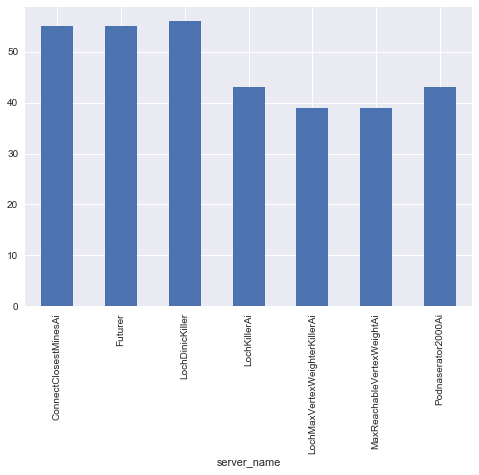

In [17]:
data.loc[data.ranking==0].groupby('server_name').size().plot(kind='bar')
plt.savefig('winners.png')

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


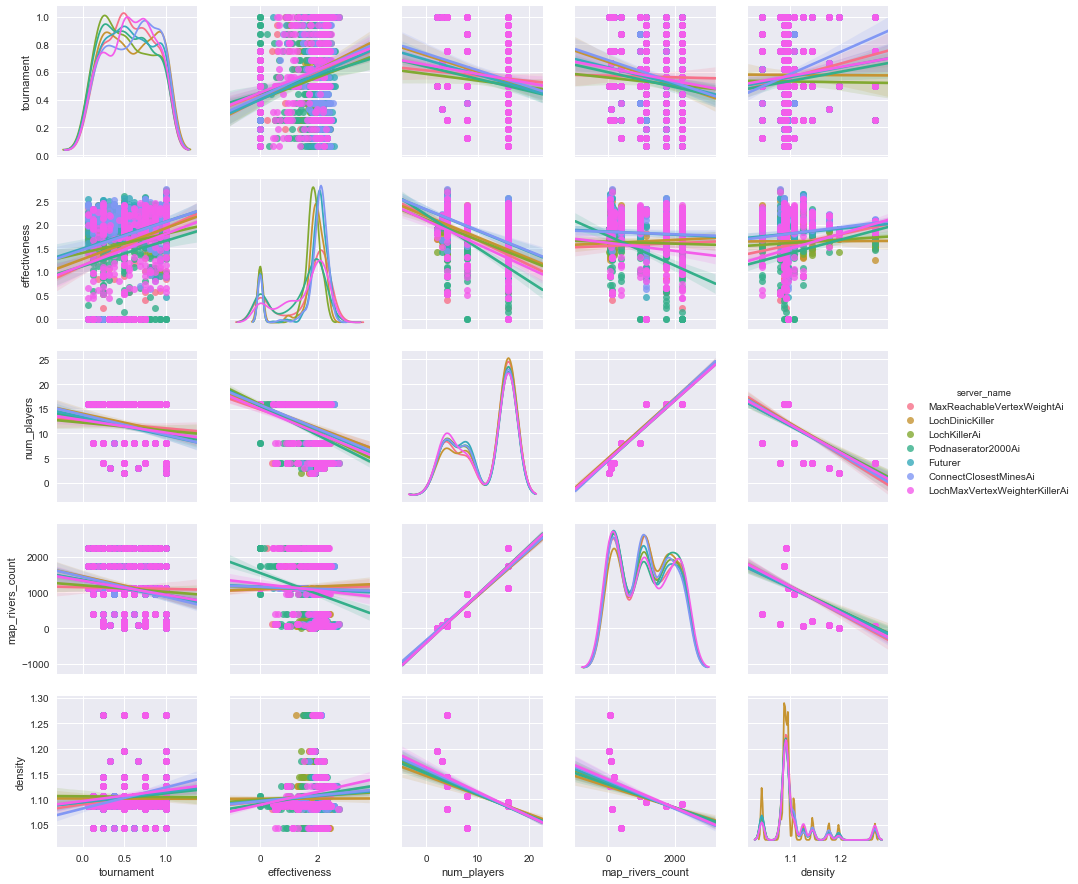

In [6]:
sns.pairplot(
    data,
    vars=['tournament','effectiveness','num_players','map_rivers_count','density'],
    hue='server_name',
    kind='reg',
    diag_kind='kde',
    plot_kws={ 'scatter_kws' : {'alpha' : 0.8}})

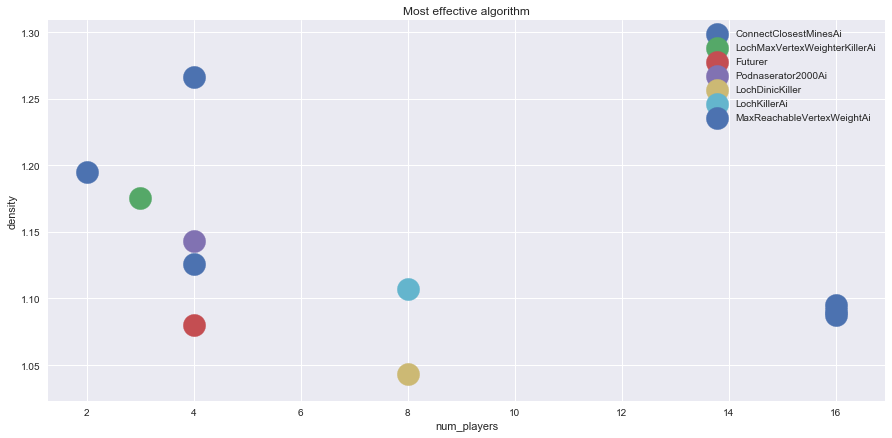

In [16]:
x_axis = 'num_players'
y_axis = 'density'

plt.subplots(1,1,figsize=(15,7))
plt.subplot()
winners = (data
 .groupby([x_axis,y_axis,'server_name'])
 .mean()
 .loc[:,'tournament']
 .reset_index()
 .groupby([x_axis,y_axis])
 .apply(lambda x : x.sort_values('tournament',ascending=False).iloc[0]['server_name'])
 .to_frame('winner')
     .reset_index()
 )

for winner in winners.winner.unique():
    s = winners.loc[winners.winner == winner]
    plt.scatter(
        s[x_axis],
        s[y_axis],
        label = winner,
        s=500
    )
plt.legend()
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Most effective algorithm')
plt.savefig('most-effective.png')